In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.spatial.distance import pdist,squareform
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler

### Lectura del dataset

In [1]:
#Link de descarga del dataset
#https://www.kaggle.com/mrmorj/dataset-of-songs-in-spotify
data = pd.read_csv('./genres_v2.csv', sep=",", low_memory=False)
data.shape

NameError: name 'pd' is not defined

In [3]:
data.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [4]:
data.drop(columns=['id', 'uri', "type", 'track_href', 'analysis_url', 'song_name', 'Unnamed: 0', "title", "time_signature", "key", "duration_ms"], inplace=True)

In [58]:
data.columns

Index(['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [82]:
data.corr()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,-0.312587,-0.255598,0.066441,0.117811,0.054744,0.060642,-0.208059,0.361815,-0.251429
energy,-0.312587,1.000000,0.531363,-0.021767,-0.117737,-0.536247,0.289024,0.212996,-0.070299,0.016040
loudness,-0.255598,0.531363,1.000000,-0.006243,0.130751,-0.242016,-0.273321,0.153488,0.050511,0.245289
mode,0.066441,-0.021767,-0.006243,1.000000,0.035837,-0.006326,0.008975,0.009480,0.021345,-0.026626
speechiness,0.117811,-0.117737,0.130751,0.035837,1.000000,0.172456,-0.378004,0.070353,0.177732,0.147260
acousticness,0.054744,-0.536247,-0.242016,-0.006326,0.172456,1.000000,-0.292820,-0.094803,0.113483,0.050453
instrumentalness,0.060642,0.289024,-0.273321,0.008975,-0.378004,-0.292820,1.000000,-0.040962,-0.237523,-0.226864
liveness,-0.208059,0.212996,0.153488,0.009480,0.070353,-0.094803,-0.040962,1.000000,-0.053488,0.050539
valence,0.361815,-0.070299,0.050511,0.021345,0.177732,0.113483,-0.237523,-0.053488,1.000000,0.038283
tempo,-0.251429,0.016040,0.245289,-0.026626,0.147260,0.050453,-0.226864,0.050539,0.038283,1.000000


<AxesSubplot:>

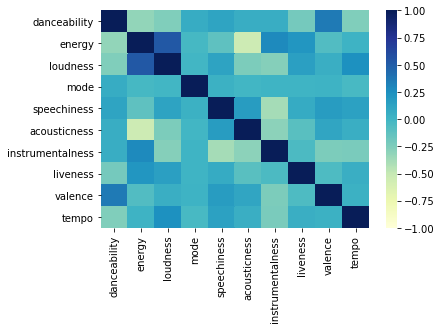

In [83]:
sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu")

### Exploración de las medias de las features por género

In [7]:
#data_2 = data.groupby(by="genre").describe()
#data_2 = data_2.droplevel(level=0, axis=1)
#data_2.drop(columns=["count", "std", "min", "25%", "50%", "75%", "max"], inplace=True)
#columns = ['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
#columns = ['danceability', 'energy', 'loudness', 'mode', 'speechiness','instrumentalness', 'valence', 'tempo', 'acousticness']
#data_2.columns = columns
#data_2

### Elimino los géneros que desbalancean el dataset

In [8]:
mask_underground = data["genre"] == "Underground Rap"
data.drop(index=data[mask_underground].index, inplace=True)
mask_dark = data["genre"] == "Dark Trap"
data.drop(index=data[mask_dark].index, inplace=True)
mask_pop = data["genre"] == "Pop"
data.drop(index=data[mask_pop].index, inplace=True)

In [72]:
data["genre"].value_counts(normalize=True).round(3)

Hiphop        0.096
trance        0.096
trap          0.095
techhouse     0.095
dnb           0.094
psytrance     0.094
techno        0.094
hardstyle     0.094
RnB           0.067
Trap Metal    0.062
Rap           0.059
Emo           0.054
Name: genre, dtype: float64

In [85]:
data.shape

(31391, 11)

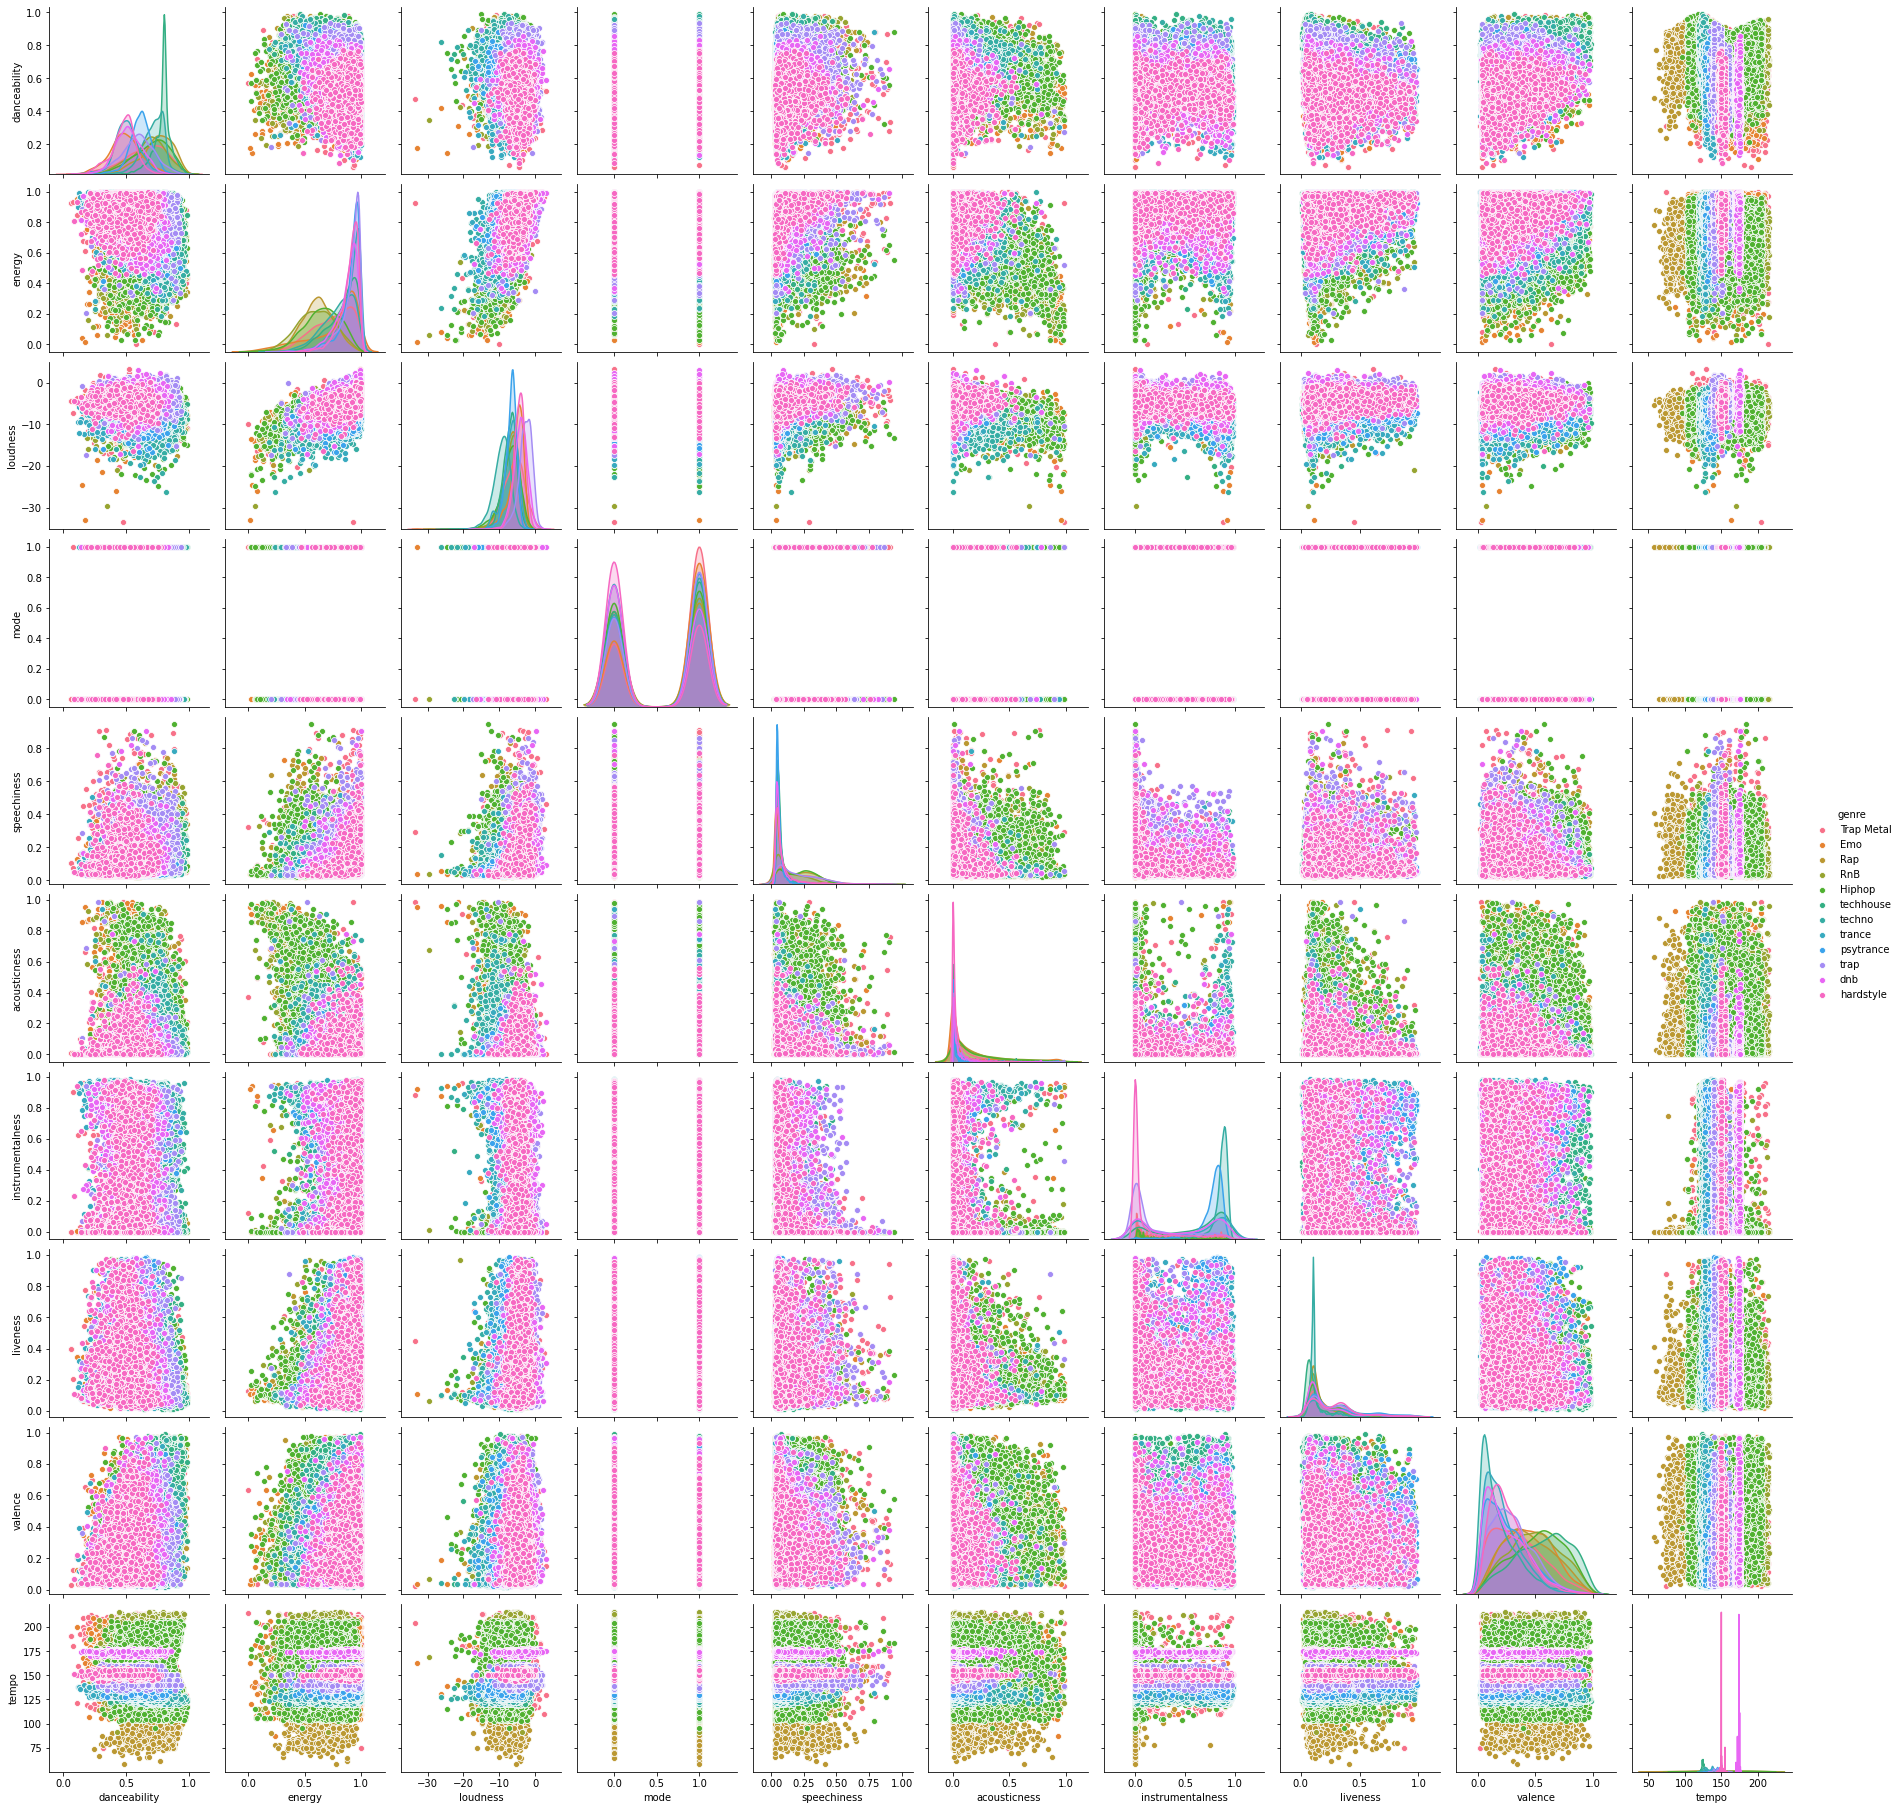

In [70]:
#sns.pairplot(data, hue='genre');

### Features, Variable Target y Normalización

In [10]:
X = data.drop(columns=["genre"])
y = data["genre"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 0)

In [12]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

### Función para evaluar modelos

In [13]:
def evaluate_model(model,X,y_true):
    '''
    Calcula las métricas ppales para evaluar un clasificador
    Toma como imput el modelo entrenado, el dataset de testeo y sus etiquetas
    '''
    y_pred=model.predict(X)
    y_proba=model.predict_proba(X)

    print(classification_report(y_true,y_pred))
    print('Area bajo la curva ROC:',np.round(roc_auc_score(y_true, y_proba, multi_class="ovo"),4))
    plot_confusion_matrix(model,X,y_true,cmap='Blues');
    return

----------------------------------

# 1. Regresion Logistica

In [14]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_std, y_train)

LogisticRegression(max_iter=1000)

In [15]:
y_pred=lr.predict(X_test_std)
y_proba=lr.predict_proba(X_test_std)

In [16]:
accuracy_score(y_train, lr.predict(X_train_std))

0.6460094295544323

              precision    recall  f1-score   support

         Emo       0.41      0.44      0.42       420
      Hiphop       0.50      0.55      0.53       757
         Rap       0.42      0.46      0.44       462
         RnB       0.42      0.32      0.36       525
  Trap Metal       0.39      0.23      0.29       489
         dnb       0.79      0.86      0.82       741
   hardstyle       0.68      0.70      0.69       734
   psytrance       0.77      0.78      0.78       740
   techhouse       0.75      0.79      0.77       744
      techno       0.76      0.78      0.77       739
      trance       0.70      0.72      0.71       750
        trap       0.69      0.70      0.70       747

    accuracy                           0.64      7848
   macro avg       0.61      0.61      0.61      7848
weighted avg       0.63      0.64      0.64      7848

Area bajo la curva ROC: 0.9331


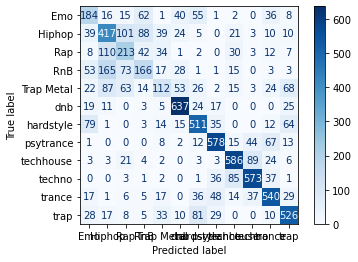

In [17]:
evaluate_model(lr, X_test_std, y_test)

#### 1.2 GridSearch

In [73]:
param_grid_lr = {'C': [1, 10, 100, 1000, 10000, 100000],
     'penalty': ["l2"],
     'solver': ['saga', "lbfgs"]}

In [74]:
folds = StratifiedKFold(n_splits=5, random_state=19, shuffle=True)

In [75]:
grid_lr = GridSearchCV(lr, param_grid_lr, cv=folds, scoring='accuracy', n_jobs=-2)

In [76]:
lr_fiteado = grid_lr.fit(X_train_std, y_train)

In [77]:
grid_lr.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [78]:
grid_lr.best_score_

0.6455416903548638

              precision    recall  f1-score   support

         Emo       0.41      0.44      0.42       420
      Hiphop       0.50      0.55      0.53       757
         Rap       0.43      0.46      0.44       462
         RnB       0.42      0.32      0.36       525
  Trap Metal       0.39      0.23      0.29       489
         dnb       0.79      0.86      0.82       741
   hardstyle       0.67      0.69      0.68       734
   psytrance       0.77      0.78      0.78       740
   techhouse       0.75      0.79      0.77       744
      techno       0.76      0.77      0.77       739
      trance       0.70      0.72      0.71       750
        trap       0.69      0.70      0.70       747

    accuracy                           0.64      7848
   macro avg       0.61      0.61      0.61      7848
weighted avg       0.63      0.64      0.64      7848

Area bajo la curva ROC: 0.9331


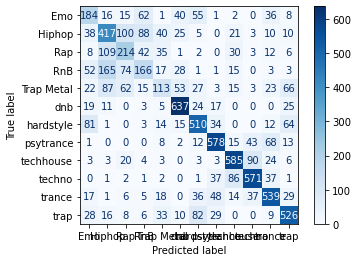

In [80]:
evaluate_model(grid_lr, X_test_std, y_test)

----------------------------------

# 2. Naive Bayes

#### 2.1. Sin normalización

In [25]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [26]:
y_pred = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)
print("Accuracy test sin normalizar", accuracy_score(y_test, y_pred))
print("Accuracy train sin normalizar", accuracy_score(y_train, y_pred_train))

Accuracy test sin normalizar 0.6708715596330275
Accuracy train sin normalizar 0.6717495646264282


#### 2.2. Con normalización

In [27]:
gnb_std = GaussianNB()
gnb_std.fit(X_train_std, y_train)

GaussianNB()

In [28]:
y_pred_train_std = gnb_std.predict(X_train_std)
print("Accuracy train con normalización", accuracy_score(y_train, y_pred_train_std))

Accuracy train con normalización 0.6715796627447649


              precision    recall  f1-score   support

         Emo       0.47      0.53      0.50       420
      Hiphop       0.58      0.48      0.53       757
         Rap       0.40      0.65      0.50       462
         RnB       0.40      0.41      0.40       525
  Trap Metal       0.43      0.19      0.27       489
         dnb       0.97      0.96      0.96       741
   hardstyle       0.77      0.81      0.79       734
   psytrance       0.67      0.86      0.75       740
   techhouse       0.83      0.86      0.84       744
      techno       0.77      0.75      0.76       739
      trance       0.71      0.62      0.66       750
        trap       0.74      0.64      0.68       747

    accuracy                           0.67      7848
   macro avg       0.64      0.65      0.64      7848
weighted avg       0.67      0.67      0.67      7848

Area bajo la curva ROC: 0.9441


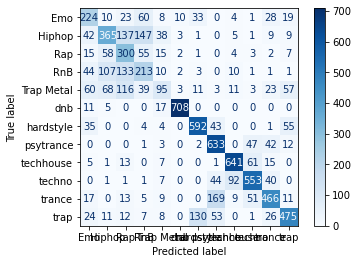

In [29]:
evaluate_model(gnb_std, X_test_std, y_test)

----------------------------------

# 3. Árboles

#### 3.1. Sin normalización

In [30]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(random_state=40)

In [31]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=40)

In [32]:
y_train_pred_tree = clftree.predict(X_train)
y_test_pred_tree = clftree.predict(X_test)

In [33]:
accuracy_score(y_train, y_train_pred_tree)

0.9861529966444378

              precision    recall  f1-score   support

         Emo       0.58      0.59      0.59       420
      Hiphop       0.47      0.47      0.47       757
         Rap       0.47      0.51      0.49       462
         RnB       0.34      0.32      0.33       525
  Trap Metal       0.36      0.34      0.35       489
         dnb       0.97      0.98      0.97       741
   hardstyle       0.85      0.87      0.86       734
   psytrance       0.84      0.81      0.82       740
   techhouse       0.85      0.86      0.85       744
      techno       0.76      0.75      0.75       739
      trance       0.78      0.77      0.78       750
        trap       0.76      0.78      0.77       747

    accuracy                           0.70      7848
   macro avg       0.67      0.67      0.67      7848
weighted avg       0.70      0.70      0.70      7848

Area bajo la curva ROC: 0.8232


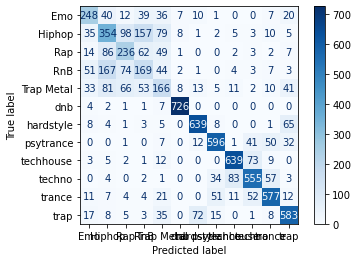

In [34]:
evaluate_model(clftree, X_test, y_test)

#### 3.2. Con normalización

In [35]:
clftree_std = tree.DecisionTreeClassifier(random_state=40)

In [36]:
clftree_std.fit(X_train_std, y_train)

DecisionTreeClassifier(random_state=40)

In [37]:
y_train_pred_tree_std = clftree_std.predict(X_train_std)
y_test_pred_tree_std = clftree_std.predict(X_test_std)

In [38]:
accuracy_score(y_train, y_train_pred_tree_std)

0.9861529966444378

              precision    recall  f1-score   support

         Emo       0.60      0.59      0.60       420
      Hiphop       0.47      0.48      0.47       757
         Rap       0.48      0.50      0.49       462
         RnB       0.34      0.32      0.33       525
  Trap Metal       0.36      0.34      0.35       489
         dnb       0.97      0.98      0.98       741
   hardstyle       0.86      0.87      0.87       734
   psytrance       0.84      0.80      0.82       740
   techhouse       0.85      0.86      0.85       744
      techno       0.75      0.76      0.75       739
      trance       0.79      0.77      0.78       750
        trap       0.75      0.78      0.77       747

    accuracy                           0.70      7848
   macro avg       0.67      0.67      0.67      7848
weighted avg       0.70      0.70      0.70      7848

Area bajo la curva ROC: 0.8234


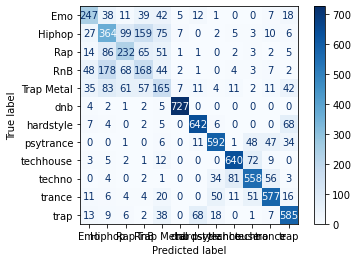

In [39]:
evaluate_model(clftree_std, X_test_std, y_test)

#### 3.3. GridSearch

In [40]:
params_grid = { "criterion" : ["gini", "entropy"],
                "min_samples_leaf": [5,10,15,20,None], 
                "max_depth" : [1,2,3,4,5,6,8,9,10,11,12,13,14,None],
                "min_samples_split": [2, 3, 4,None]}

In [41]:
grid_search = GridSearchCV(clftree, params_grid,
                           n_jobs=-2, scoring='accuracy')

In [42]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=40), n_jobs=-2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13,
                                       14, None],
                         'min_samples_leaf': [5, 10, 15, 20, None],
                         'min_samples_split': [2, 3, 4, None]},
             scoring='accuracy')

In [43]:
#Score durante el entrenamiento.
grid_search.best_score_

0.7211481999165358

In [44]:
grid_search.best_params_ 

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [45]:
cv_clf = grid_search.best_estimator_

In [46]:
cv_clf

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=5,
                       random_state=40)

              precision    recall  f1-score   support

         Emo       0.61      0.60      0.61       420
      Hiphop       0.52      0.59      0.55       757
         Rap       0.55      0.58      0.57       462
         RnB       0.40      0.37      0.38       525
  Trap Metal       0.40      0.32      0.36       489
         dnb       0.97      0.98      0.98       741
   hardstyle       0.82      0.88      0.85       734
   psytrance       0.84      0.86      0.85       740
   techhouse       0.86      0.86      0.86       744
      techno       0.78      0.76      0.77       739
      trance       0.83      0.79      0.81       750
        trap       0.77      0.76      0.76       747

    accuracy                           0.72      7848
   macro avg       0.70      0.70      0.70      7848
weighted avg       0.72      0.72      0.72      7848

Area bajo la curva ROC: 0.923


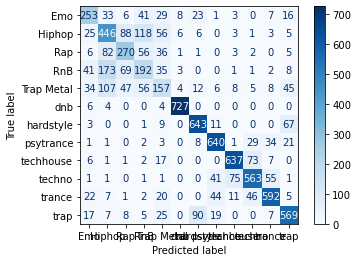

In [47]:
evaluate_model(cv_clf, X_test, y_test)

----------------------------------

# 4. Clustering

In [48]:
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(X_train_std)
PCA_dataset1 = pd.DataFrame(data = principalComponents1, columns = ['component1', 'component2'] )
principal_component1 = PCA_dataset1['component1']
principal_component2 = PCA_dataset1['component2']

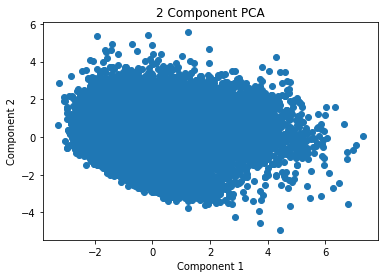

In [49]:
plt.figure()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(PCA_dataset1['component1'], PCA_dataset1['component2']) #c = y_kmeans, s=10)

In [50]:
kmeans = KMeans(n_clusters = 12, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(principalComponents1)
labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

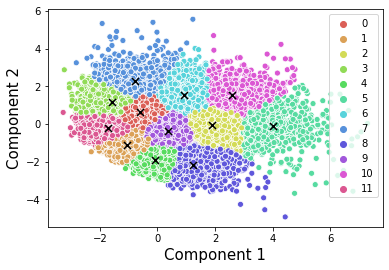

In [81]:
sns.scatterplot(x=principal_component1,y=principal_component2,hue=labels,legend='full',palette=sns.color_palette("hls", 12));
plt.xlabel('Component 1',fontsize=15);plt.ylabel('Component 2',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

In [52]:
data_clustering = data[['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'valence', 'tempo',
       'acousticness', "liveness"]]

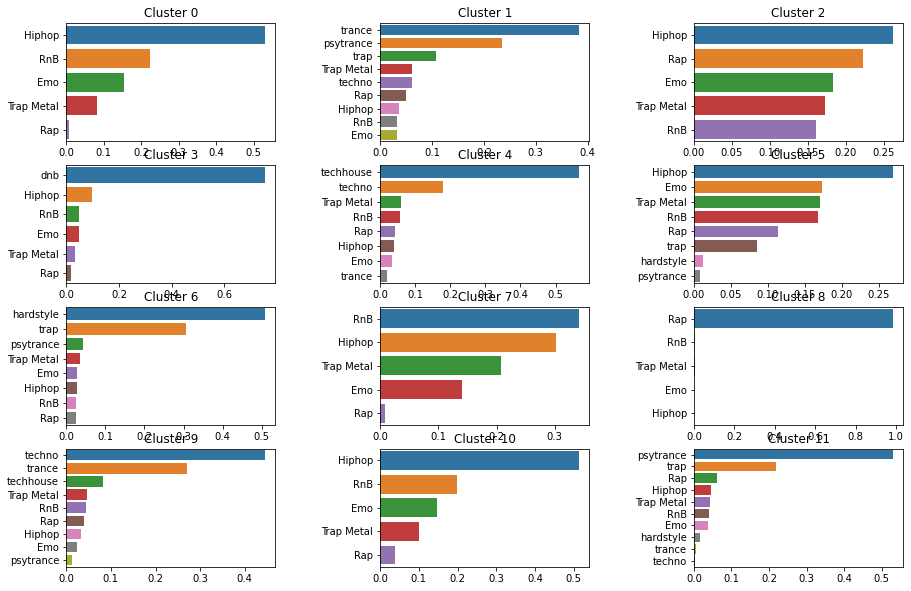

In [53]:
k=12;
km=KMeans(n_clusters=k, init = 'k-means++', random_state=0)
km.fit(X)

data_filtered=data.loc[data_clustering.index];
f,ax=plt.subplots(4,3,figsize=(15,10),gridspec_kw={'wspace':0.5})
ax=ax.ravel();
for lbl in range(k):
    S=data_filtered.loc[km.labels_==lbl,'genre'].value_counts(normalize=True);
    chart=sns.barplot(y=S.index[:10],x=S.values[:10],ax=ax[lbl],orient='h')
    chart.set_title('Cluster '+str(lbl))

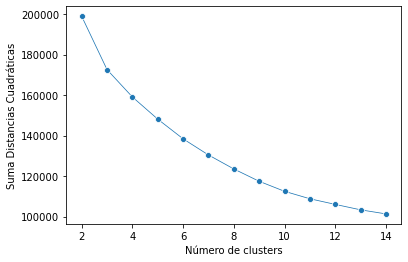

In [54]:
sq_distances=[]
k_values=range(2,15);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(X_train_std)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters');

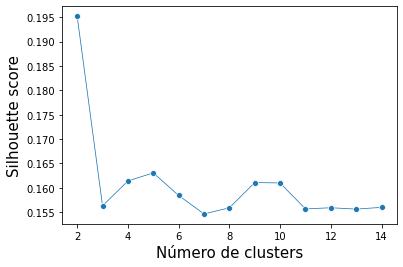

In [55]:
from sklearn.metrics import silhouette_score,silhouette_samples

sil=[]
k_values=range(2,15);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=15,random_state=0) # Numero de repeticiones=10
    kmeans.fit(X_train_std)
    score=silhouette_score(X_train_std,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

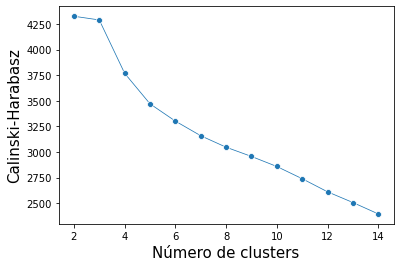

In [56]:
from sklearn.metrics import calinski_harabasz_score

k_values=range(2,15);
ch_scores=[]

for k in k_values:
    
    kmeans=KMeans(n_clusters=k,n_init=15,random_state=0) # Numero de repeticiones=10
    kmeans.fit(X_train_std)
    score=calinski_harabasz_score(X_train_std,kmeans.labels_)
    ch_scores.append(score)

sns.lineplot(x=k_values,y=ch_scores,marker='o',size=30,legend=False);
plt.ylabel('Calinski-Harabasz',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);
